**Heart Disease Prediction using Machine Learning :**

        
        This project aims to predict the likelihood of heart disease using supervised learning techniques on a cleaned dataset. Two models are trained and compared: Logistic Regression and Random Forest.

**1. Load Libraries and Dataset**

In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("cleaned_merged_heart_dataset.csv")

print("Dataset Shape",df.shape)
df.head()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Dataset Shape (1888, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**2. Dataset Overview**

In [6]:

print("\nMissing Values:\n", df.isnull().sum())

print("\nDataset Info:\n")
print(df.info())

df.describe()



Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


**3. Visualize Target Variable Distribution**

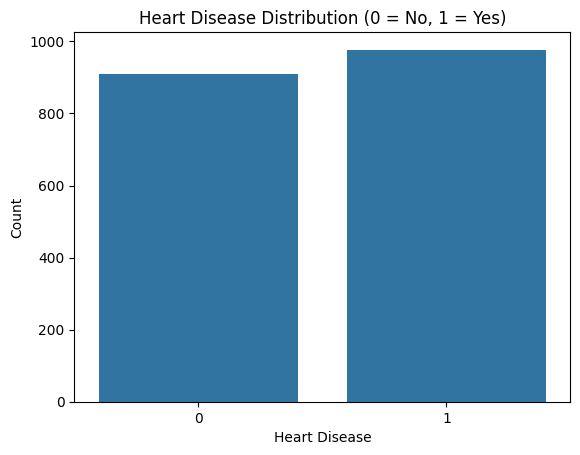

In [3]:
# Countplot of target variable
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


 **4. Correlation Heatmap**

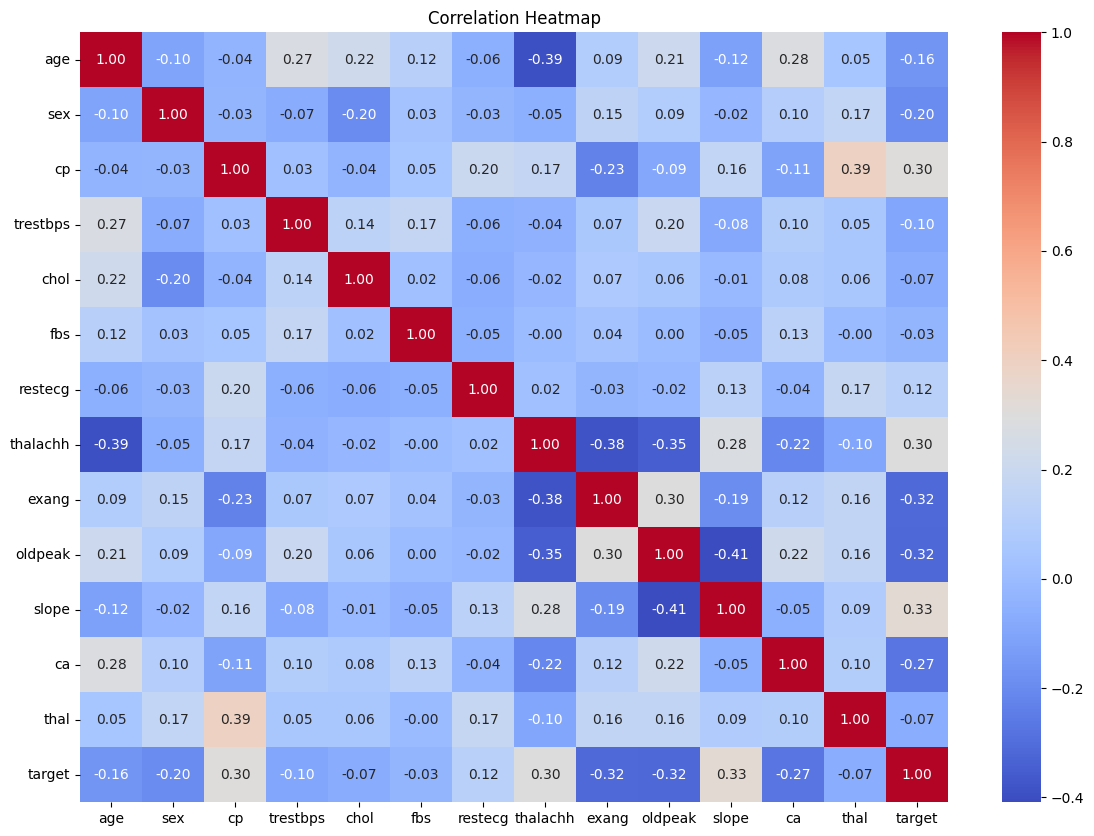

In [4]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**5. Split Data into Features and Target**

In [5]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


**6. Train/Test Split**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**7. Logistic Regression**

🔹 Logistic Regression Accuracy: 72.49%
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       188
           1       0.69      0.82      0.75       190

    accuracy                           0.72       378
   macro avg       0.73      0.72      0.72       378
weighted avg       0.73      0.72      0.72       378



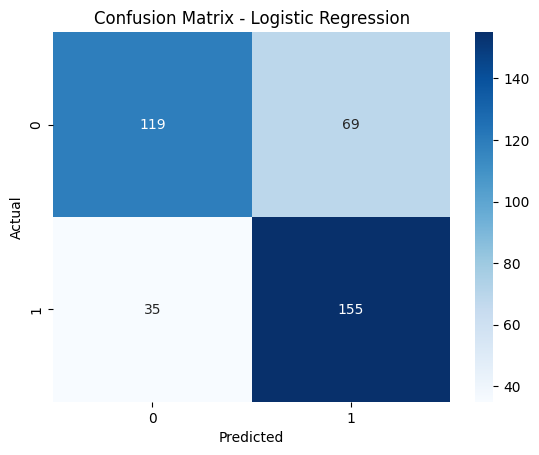

In [7]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
log_preds = log_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_accuracy = accuracy_score(y_test, log_preds)
print(f"🔹 Logistic Regression Accuracy: {log_accuracy * 100:.2f}%")

# Classification Report
print(classification_report(y_test, log_preds))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**8. Random Forest Classifier**

🔸 Random Forest Accuracy: 96.56%
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       188
           1       0.97      0.96      0.97       190

    accuracy                           0.97       378
   macro avg       0.97      0.97      0.97       378
weighted avg       0.97      0.97      0.97       378



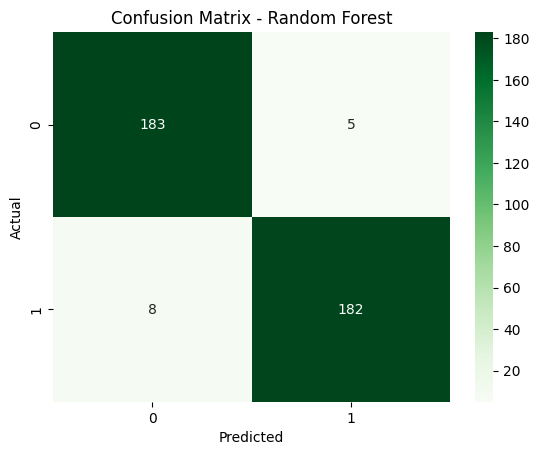

In [8]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"🔸 Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Classification Report
print(classification_report(y_test, rf_preds))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**9. Model Comparison**

🔹 Logistic Regression Accuracy: 72.49%
🔸 Random Forest Accuracy: 96.56%


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_12704\2911239310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=['skyblue', 'lightgreen'])


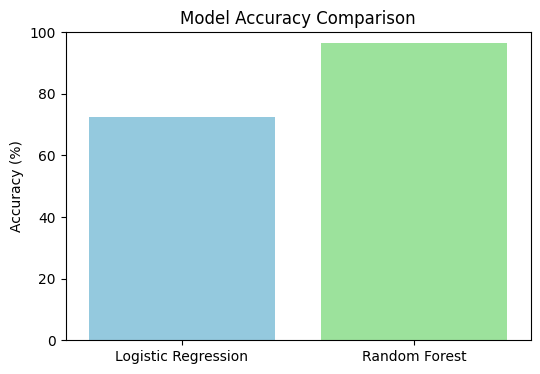

In [9]:
# Compare Model Accuracies
print("🔹 Logistic Regression Accuracy: {:.2f}%".format(log_accuracy * 100))
print("🔸 Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))

# Bar Chart Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy * 100, rf_accuracy * 100]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette=['skyblue', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()


##  Final Conclusion & Technical Interpretation

This project focused on building an accurate, interpretable, and practically relevant model to predict the presence of heart disease using machine learning.

We implemented and compared two models:
- **Logistic Regression** (baseline)
- **Random Forest Classifier** (advanced)

---

###  Results Summary

- **Logistic Regression Accuracy:** 72.49%
- **Random Forest Accuracy:** 96.56%

Random Forest significantly outperformed Logistic Regression, indicating that the dataset had **non-linear relationships and complex interactions** that tree-based models captured more effectively.

---

###  What Did the Data Teach Us?

A deeper analysis of feature relationships revealed strong and medically sound patterns:

| Feature                 | Observation & Impact |
|-------------------------|----------------------|
| **Chest Pain Type (cp)**      | Certain chest pain types highly associated with disease presence |
| **Max Heart Rate (thalachh)** | Lower values linked with heart disease |
| **ST Depression (oldpeak)**   | Higher depression = higher risk |
| **Exercise-Induced Angina**   | Presence of angina during exercise was a clear risk factor |
| **Major Vessels Colored (ca)**| More blocked vessels = higher chance of disease |
| **Thalassemia (thal)**        | Abnormal thal values were strong indicators |

These features align closely with real-world cardiology, validating both the dataset and the model.

---

###  What Makes This Outcome Valuable?

1. The model wasn’t just accurate — it **learned patterns that doctors already trust**.  
2. It reaffirmed clinical knowledge using data, and can assist in **early warning systems, triage, and digital diagnostics**.

> "When machine learning meets medical reasoning, we don’t just predict — we understand."

---

###  Future Possibilities

-  **Hyperparameter tuning** (GridSearchCV, RandomizedSearchCV) to further boost performance
-  Build a **Streamlit or Flask web app** for real-time prediction
-  Apply **SHAP/LIME** to explain individual predictions to doctors
-  Expand with larger datasets to improve generalizability
-  Integrate patient lifestyle or genetic data for holistic risk analysis

---

###  Final Word

This project proves how combining medical intuition with machine learning can create practical, meaningful, and accurate solutions.  
It’s a perfect example of how data science is more than numbers — it's about **impact**.

**Developed by Azib Malick**  
© 2025 Azib Malick. All rights reserved.
